In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import statsmodels.formula.api as smf


import matplotlib.pyplot as plt

import datetime as dt

In [3]:
df = pd.read_csv('/Users/lailasprejer/metis/metisgh/nyc18_ds17/challenges/challenges_data/2013_movies.csv')

In [4]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [5]:
df.Rating.unique()

array(['PG-13', 'PG', 'G', 'R'], dtype=object)

### Challenge 1
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [9]:
df['c'] = 1

In [10]:
m = LinearRegression()

In [11]:
m.fit(df[['c']],df['DomesticTotalGross'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

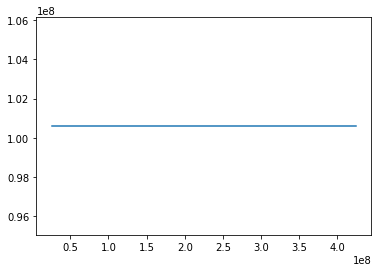

In [12]:
c = df['c'].values.reshape(-1,1)
pred = m.predict(c)
plt.plot(df['DomesticTotalGross'],pred)

(array([  3.,   1.,   0.,   3.,   4.,   3.,   3.,  15.,  21.,  47.]),
 array([ -3.24071172e+08,  -2.84161192e+08,  -2.44251213e+08,
         -2.04341233e+08,  -1.64431253e+08,  -1.24521274e+08,
         -8.46112942e+07,  -4.47013146e+07,  -4.79133498e+06,
          3.51186446e+07,   7.50286242e+07]),
 <a list of 10 Patch objects>)

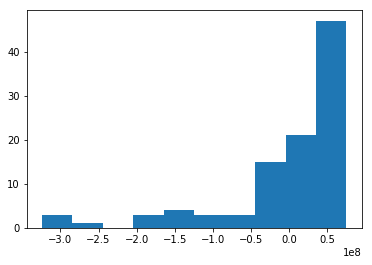

In [13]:
res = pred-df['DomesticTotalGross']
plt.hist(res)

### Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

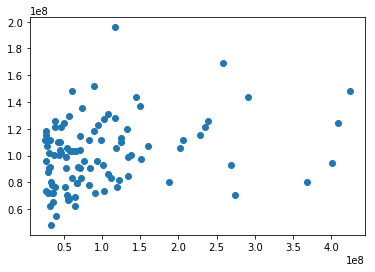

In [14]:
m.fit(df[['c','Runtime']],df['DomesticTotalGross'])
pred = m.predict(df[['c','Runtime']])
plt.scatter(df['DomesticTotalGross'],pred)

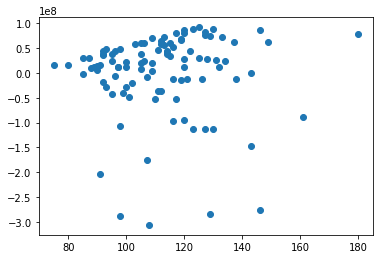

In [29]:
plt.scatter(df['Runtime'],pred-df['DomesticTotalGross'])

In [ ]:
plt.scatter(df['Runtime'],pred-)

(array([  4.,   0.,   1.,   2.,   3.,   4.,   9.,  19.,  32.,  26.]),
 array([ -3.06130925e+08,  -2.66329552e+08,  -2.26528179e+08,
         -1.86726806e+08,  -1.46925433e+08,  -1.07124060e+08,
         -6.73226868e+07,  -2.75213138e+07,   1.22800593e+07,
          5.20814323e+07,   9.18828053e+07]),
 <a list of 10 Patch objects>)

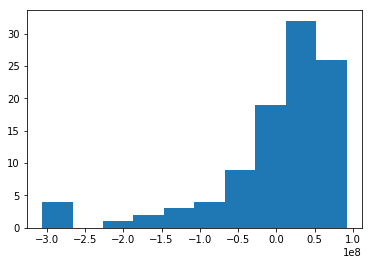

In [15]:
plt.hist(pred-df['DomesticTotalGross'])

### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

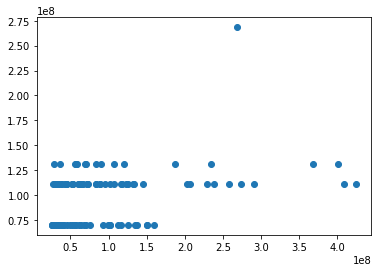

In [31]:
model = df[['c','Rating']]
model = pd.get_dummies(model)

m.fit(model,df['DomesticTotalGross'])

plt.scatter(df['DomesticTotalGross'],m.predict(model))

(array([  3.,   2.,   0.,   1.,   4.,   9.,  12.,  19.,  30.,  20.]),
 array([ -2.78524250e+08,  -2.40948444e+08,  -2.03372638e+08,
         -1.65796832e+08,  -1.28221025e+08,  -9.06452194e+07,
         -5.30694133e+07,  -1.54936072e+07,   2.20821989e+07,
          5.96580050e+07,   9.72338111e+07]),
 <a list of 10 Patch objects>)

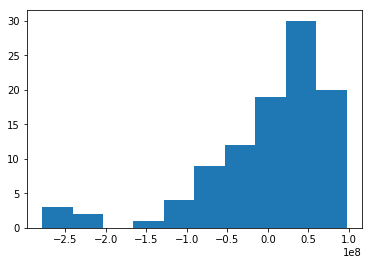

In [17]:
plt.hist(m.predict(model)-df['DomesticTotalGross'])

### Challenge 4 & 5

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [18]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,c
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [19]:
df["ReleaseDate"] = pd.to_datetime(df['ReleaseDate'], 
                                            format="%Y/%m/%d %H:%M:%S")

df['Year']=df['ReleaseDate'].dt.year

In [20]:
model = df[['Budget','DomesticTotalGross','Rating','Runtime','Year']]
model = model.dropna()
model = pd.get_dummies(model)

In [30]:
model.head()

,Budget,DomesticTotalGross,Runtime,Year,Rating_PG,Rating_PG-13,Rating_R
0,130000000.0,424668047,146,2013,0,1,0
1,200000000.0,409013994,129,2013,0,1,0
2,150000000.0,400738009,108,2013,1,0,0
3,76000000.0,368061265,98,2013,1,0,0
4,225000000.0,291045518,143,2013,0,1,0


In [21]:
X, y = model.drop('DomesticTotalGross',axis=1), model['DomesticTotalGross']

In [22]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.25, random_state=10)

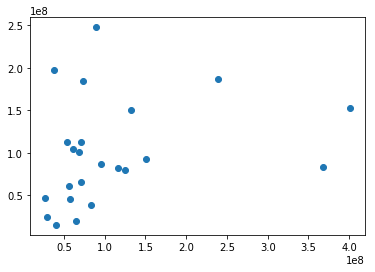

In [23]:
# Awful model!!! 

m.fit(X,y)
m.score(X,y)
plt.scatter(y_test,m.predict(X_test))

In [24]:
m.score(X_test,y_test)

-0.066771307853276562